# Курсовой проект по теме "Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn"

### 1. Загрузим необходимые библиотеки, файлы, скрипты и модули, которые понадобятся нам в проекте.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.model_selection import KFold

In [2]:
train_directory = '/home/maxim/Документы/GeekBrains/1 четверть. Библиотки Python для Data Science. Numpy, Matplotlib, Scikit-learn/Manuals/train.csv'

In [3]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

### 2. EDA

In [4]:
df = pd.read_csv(train_directory)

In [5]:
data_to_change_type = df.select_dtypes(include='object').keys()
for column in data_to_change_type:
    old_values = np.sort((pd.unique(df[column])))
    new_values = [num for num in range(0, len(old_values))]
    for val in range(len(pd.unique(df[column]))):
        df[column] = np.where(df[column] == old_values[val], new_values[val], df[column])
    df[column] = df[column].astype(float)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'DistrictId'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>],
       [<AxesSubplot:title={'center':'LifeSquare'}>,
        <AxesSubplot:title={'center':'KitchenSquare'}>,
        <AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>],
       [<AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>,
        <AxesSubplot:title={'center':'Ecology_2'}>,
        <AxesSubplot:title={'center':'Ecology_3'}>],
       [<AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Healthcare_1'}>],
       [<AxesSubplot:title={'center':'Helthcare_2'}>,
        <AxesSubplot:title={'center':'Shops_1'}>,
        <AxesSubplot:title={'center':'Shops_2'}>,
        <AxesSubplot:

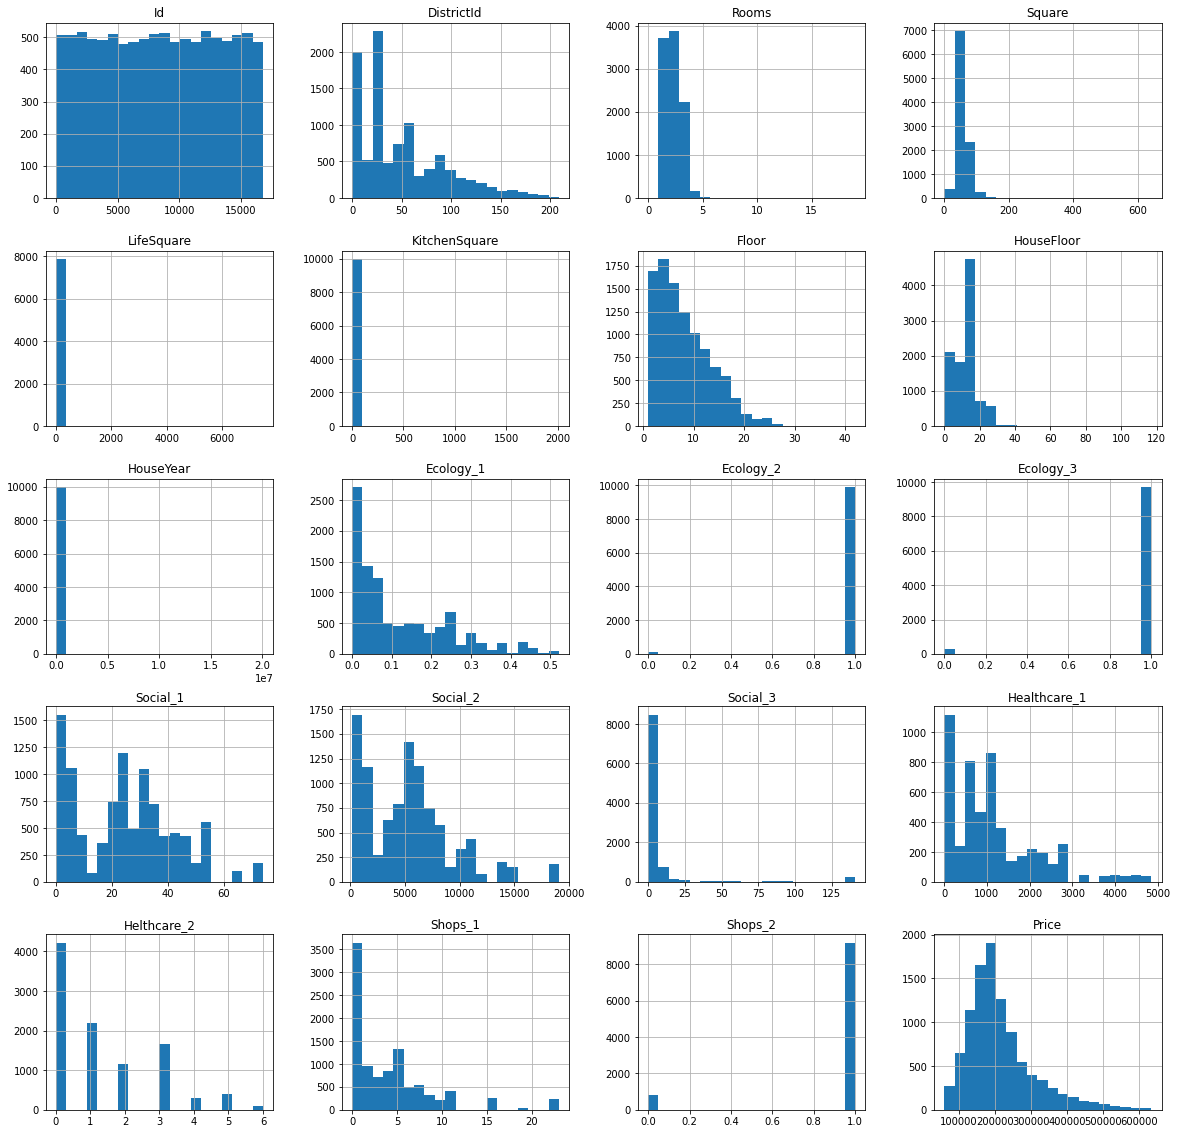

In [6]:
df.hist(figsize=(20,20), bins=20)

In [7]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.917500,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  float64
 11  Ecology_3      10000 non-null  float64
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

### **Параметр Rooms**

In [9]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

#### Заменим значения, которые больше 6 на моду, а те, которые равны 0 на 1.

### **Параметр Square**

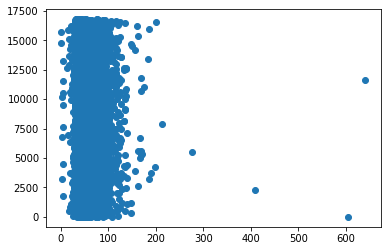

In [10]:
plt.scatter(df['Square'], df['Id'])

In [11]:
(df['Square'] > 300).sum()

3

In [12]:
(df['Square'] < 10).sum()

12

#### Заменим значения, которые больше 300 на среднее значение, а те, которые меньше 10 на медианные.

### **Параметр LifeSquare**

In [13]:
(df['LifeSquare'] > 250).sum()

5

#### Эти значения заменим на средние.

In [14]:
(df['LifeSquare'] < 10).sum()

205

#### Эти значения заменим на медианные.

In [15]:
(df['LifeSquare'].isnull()).sum()

2113

In [16]:
((df['LifeSquare'] + df['KitchenSquare']) > df['Square']).sum()

845

#### Эти значения заменим на среднее соотношение жилплощади к общей.

### **Параметр KitchenSquare**

In [17]:
df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
41.0         2
112.0        2
25.0         2
43.0         2
51.0         2
37.0         2
32.0         2
30.0         2
58.0         2
72.0         1
96.0         1
66.0         1
48.0         1
40.0         1
2014.0       1
35.0         1
60.0         1
78.0         1
27.0         1
84.0         1
62.0         1
42.0         1
63.0         1
39.0         1
1970.0       1
36.0         1
75.0         1
26.0         1
21.0         1
29.0         1
23.0         1
73.0         1
123.0        1
31.0         1
53.0         1
54.0         1
Name: KitchenSquare, dtype: int64

In [18]:
(df['KitchenSquare'] < 2).sum()

3157

#### Изменим значения на 2.

In [19]:
(df['KitchenSquare'] > 50).sum()

21

#### Эти значения меняем на медиану.

### **Параметр HouseFloor**

In [20]:
(df['Floor'] > df['HouseFloor']).sum()

1825

#### Заменим значения HouseFloor, где Floor < 5 на 5, где < 10 на 10, где < 15 на 15, где < 20 на 20, а остальные поменяем на значение Floor.

In [21]:
(df['HouseFloor'] > 60).sum()

3

#### Заменим на значение 60.

In [22]:
df['HouseFloor'].value_counts()

17.0     2331
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       497
25.0      374
22.0      343
0.0       269
24.0      176
8.0       141
10.0      135
4.0       134
3.0       127
15.0      123
19.0      108
20.0      105
18.0       89
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
37.0        4
32.0        4
28.0        3
48.0        2
99.0        2
39.0        2
117.0       1
29.0        1
31.0        1
38.0        1
44.0        1
36.0        1
26.0        1
45.0        1
47.0        1
Name: HouseFloor, dtype: int64

### **Параметр HouseYear**

In [23]:
(df['HouseYear'] > 2020).sum()

2

#### Меняем на медианные значения.

### **Healthcare_1**

In [24]:
(df['Healthcare_1'].isna()).sum()

4798

#### Параметр удаляем.

In [25]:
class DataPipeline:
    
    """Подготовка исходных данных. Заполнение пропусков, правка некорректных значений."""
    
    def __init__(self):
        
        """Параметры класса"""
        self.rooms_mode = None
        self.square_mean = None
        self.square_median = None
        self.lifesquare_median = None
        self.lifesquare_mean = None
        self.life_to_square = None
        self.kitchensquare_median = None
        self.houseyear_median = None
        self.medians = None
        
    def fit(self, df):
        
        """Сохранение статистик"""
        self.rooms_mode = df['Rooms'].mode()[0]
        self.square_mean = df['Square'].mean()
        self.square_median = df['Square'].median()
        self.lifesquare_mean = df['LifeSquare'].mean()
        self.lifesquare_median = df['LifeSquare'].median()
        self.life_to_square = df['LifeSquare'].median() / df['Square'].median()
        self.kitchensquare_median = df['KitchenSquare'].median()
        self.houseyear_median = df['HouseYear'].median()
        self.medians = df.median()
    
    def transform(self, df):
        
        """Трансформация данных"""
        
        # 1. Заменим буквенные значения в выборке на цифренные.
        data_to_change_type = df.select_dtypes(include='object').keys()
        for column in data_to_change_type:
            old_values = np.sort((pd.unique(df[column])))
            new_values = [num for num in range(0, len(old_values))]
            for val in range(len(pd.unique(df[column]))):
                df[column] = np.where(df[column] == old_values[val], new_values[val], df[column])
            df[column] = df[column].astype(int)

        # 2. Введем новую фичу, которая будет показывать, сколько раз был изменен объект недвижимости в ходе обработки данных.
        df['TimesChanged'] = 0
        
        # 3. Параметр Rooms. Заменим значения, которые больше 6 на моду, а те, которые равны 0 на 1.
        df['TimesChanged'] = np.where(((df['Rooms'] == 0) | (df['Rooms'] > 6)), (df['TimesChanged'] + 1), df['TimesChanged'])
        df['Rooms'] = np.where((df['Rooms'] == 0), 1, df['Rooms'])
        df['Rooms'] = np.where((df['Rooms'] > 6), self.rooms_mode, df['Rooms'])
        
        # 4. Параметр Square. Заменим значения, которые больше 300 на среднее значение, а те, которые меньше 10 на медианные.
        df['TimesChanged'] = np.where(((df['Square'] < 10) | (df['Square'] > 300)), (df['TimesChanged'] + 1), df['TimesChanged'])
        df['Square'] = np.where((df['Square'] < 10), self.square_median, df['Square'])
        df['Square'] = np.where((df['Square'] > 300), self.square_mean, df['Square'])
        
        # 5. Параметр LifeSquare. Заменим значения, которые больше 250 на среднее значение, а те, которые меньше 10 на медианные.
        # Значения NaN и значения, где жилплощадь + кухня больше общей заменим на среднее соотношение этих параметров в выборке.
        
        condition_square = (df['Square'] > (df['LifeSquare'] + df['KitchenSquare']))
        
        df['TimesChanged'] = np.where(((df['LifeSquare'] > 250) | (df['LifeSquare'] < 10) | (df['LifeSquare'].isnull()) | condition_square), (df['TimesChanged'] + 1), df['TimesChanged'])
        df['LifeSquare'] = np.where((df['LifeSquare'] < 10), self.lifesquare_median, df['LifeSquare'])
        df['LifeSquare'] = np.where((df['LifeSquare'] > 250), self.lifesquare_mean, df['LifeSquare'])
        df['LifeSquare'] = np.where((condition_square | df['LifeSquare'].isnull()), (df['Square'] * self.life_to_square), df['LifeSquare'])
        
        # 6. Параметр KitchenSquare. Значения меньше 2 заменим на 2, а больше 50 на медиану.
        df['TimesChanged'] = np.where(((df['KitchenSquare'] < 2) | (df['KitchenSquare'] > 50)), (df['TimesChanged'] + 1), df['TimesChanged'])
        df['KitchenSquare'] = np.where((df['KitchenSquare'] < 2), 2, df['KitchenSquare'])
        df['KitchenSquare'] = np.where((df['KitchenSquare'] > 50), self.kitchensquare_median, df['KitchenSquare'])
        
        # 7. Параметр HouseFloor.
        df['TimesChanged'] = np.where(((df['HouseFloor'] > 60) | (df['HouseFloor'] < df['Floor'])), (df['TimesChanged'] + 1), df['TimesChanged'])
        df['HouseFloor'] = np.where((df['HouseFloor'] > 60), 60, df['HouseFloor'])
        
        # Теперь обработаем данные, где этаж больше этажности.
        # Для значений меньше 5 этажность заменим на 5, где меньше 10 на 10, где меньше 15 на 15, где меньше 20 на 20, 
        # а все, что больше на значение этажа.
        df['HouseFloor'] = np.where(((df['HouseFloor'] < df['Floor']) & (df['Floor'] <= 5)), 5, df['HouseFloor'])
        df['HouseFloor'] = np.where(((df['HouseFloor'] < df['Floor']) & (df['Floor'] <= 10)), 10, df['HouseFloor'])
        df['HouseFloor'] = np.where(((df['HouseFloor'] < df['Floor']) & (df['Floor'] <= 15)), 15, df['HouseFloor'])
        df['HouseFloor'] = np.where(((df['HouseFloor'] < df['Floor']) & (df['Floor'] <= 20)), 20, df['HouseFloor'])
        df['HouseFloor'] = np.where((df['HouseFloor'] < df['Floor']), df['Floor'], df['HouseFloor'])
        
        # 8. Параметр HouseYear. Всё, что больше 2020 года меняем на медианные значения.
        df['TimesChanged'] = np.where((df['HouseYear'] > 2020), (df['TimesChanged'] + 1), df['TimesChanged'])
        df['HouseYear'] = np.where((df['HouseYear'] > 2020), self.houseyear_median, df['HouseYear'])
        
        # 9. Параметр Healthcare_1. Удаляем из-за большого количества пропусков.
        df.drop(['Healthcare_1'], axis=1)
        
        # 10. Если в датасете до сих пор есть незаполненные значения, заполним их медианными значениями на всякий случай.
        df.fillna(self.medians, inplace=True)
        
        return df

In [26]:
pipe = DataPipeline()
pipe.fit(df)
df = pipe.transform(df)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'DistrictId'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>],
       [<AxesSubplot:title={'center':'KitchenSquare'}>,
        <AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>],
       [<AxesSubplot:title={'center':'Ecology_2'}>,
        <AxesSubplot:title={'center':'Ecology_3'}>,
        <AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>],
       [<AxesSubplot:title={'center':'Healthcare_1'}>,
        <AxesSubplot:title={'center':'Helthcare_2'}>,
        <AxesSubplot:title={'center':'Shops_1'}>,
        <AxesSubplot:title={'center':'Shops_2'}>,
        <AxesSubplot:t

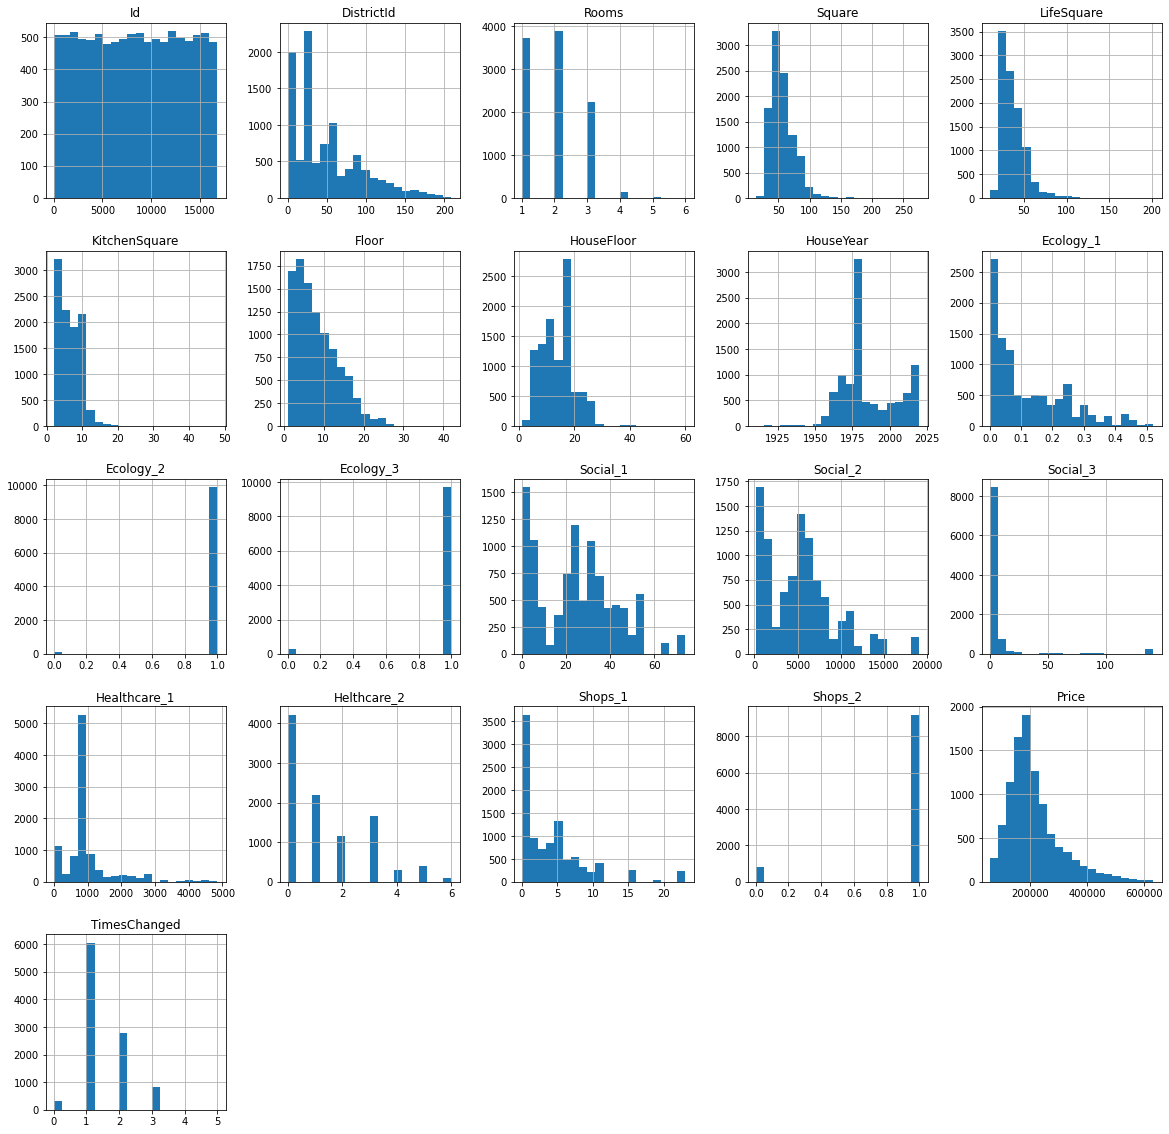

In [27]:
df.hist(figsize=(20,20), bins=20)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  float64
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  float64
 11  Ecology_3      10000 non-null  float64
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   10000 non-null  float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

### 3. Генерация новых признаков.

In [29]:
feature_names = ['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'TimesChanged']

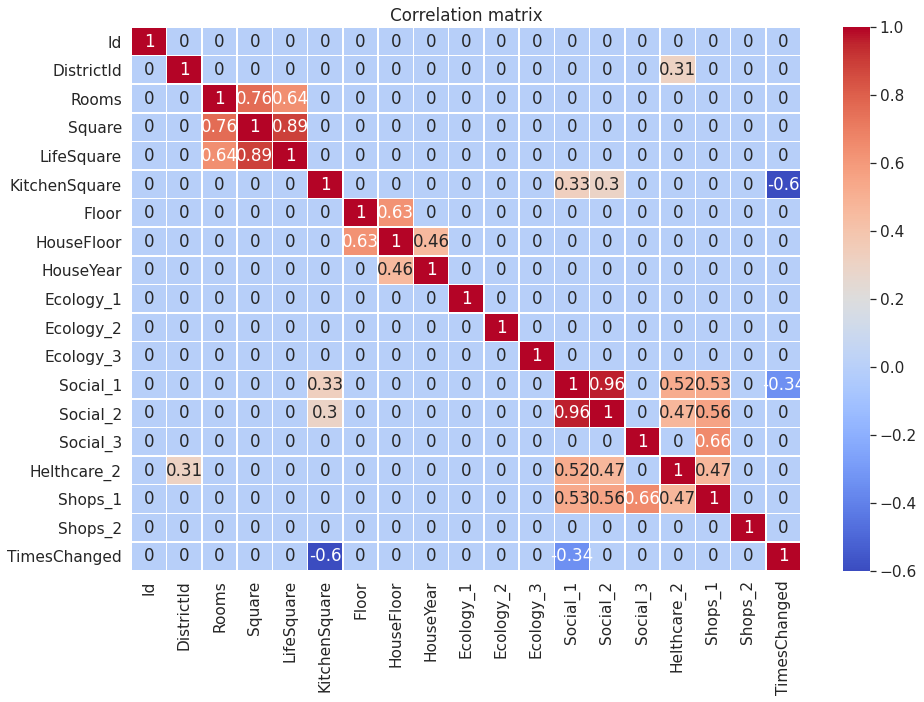

In [30]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df[feature_names].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [31]:
class NewFeatures:
    
    """Генерация новых признаков, изменение старых"""
    
    def generate(self, df):
        
        """Изменение старых признаков"""
        
        # Поменяем год постройки на декаду по счету, начиная от 1910.
        df['HouseYear'] = np.where((df['HouseYear'] <= 1910), 1, df['HouseYear'])
        df['HouseYear'] = np.where(((1910 < df['HouseYear']) & (df['HouseYear'] <= 1920)), 2, df['HouseYear'])
        df['HouseYear'] = np.where(((1920 < df['HouseYear']) & (df['HouseYear'] <= 1930)), 3, df['HouseYear'])
        df['HouseYear'] = np.where(((1930 < df['HouseYear']) & (df['HouseYear'] <= 1940)), 4, df['HouseYear'])
        df['HouseYear'] = np.where(((1940 < df['HouseYear']) & (df['HouseYear'] <= 1950)), 5, df['HouseYear'])
        df['HouseYear'] = np.where(((1950 < df['HouseYear']) & (df['HouseYear'] <= 1960)), 6, df['HouseYear'])
        df['HouseYear'] = np.where(((1960 < df['HouseYear']) & (df['HouseYear'] <= 1970)), 7, df['HouseYear'])
        df['HouseYear'] = np.where(((1970 < df['HouseYear']) & (df['HouseYear'] <= 1980)), 8, df['HouseYear'])
        df['HouseYear'] = np.where(((1980 < df['HouseYear']) & (df['HouseYear'] <= 1990)), 9, df['HouseYear'])
        df['HouseYear'] = np.where(((1990 < df['HouseYear']) & (df['HouseYear'] <= 2000)), 10, df['HouseYear'])
        df['HouseYear'] = np.where(((2000 < df['HouseYear']) & (df['HouseYear'] <= 2010)), 11, df['HouseYear'])
        df['HouseYear'] = np.where(((2010 < df['HouseYear']) & (df['HouseYear'] <= 2020)), 12, df['HouseYear'])
        
        """Генерация новых признаков"""
        
        # Соотношение этажа к этажности. Если квартира находится ближе к первому этажу, то значение будет ближе к 0, если к последнему, то к единице.
        df['FirstLastFloor'] = df['Floor'] / df['HouseFloor']
        
        # Средняя площадь комнат.
        df['RoomSquare'] = df['LifeSquare'] / df['Rooms']
        
        # Из-за сильной корреляции признаков сделаем новый на основе их отношения друг к другу.
        df['Social'] = df['Social_1'] / df['Social_2']
        
        #        
        return df

In [32]:
feat = NewFeatures()
df = feat.generate(df)

In [58]:
target_name = 'Price'
all_features = ['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'TimesChanged',
 'FirstLastFloor',
 'RoomSquare',
 'Social']

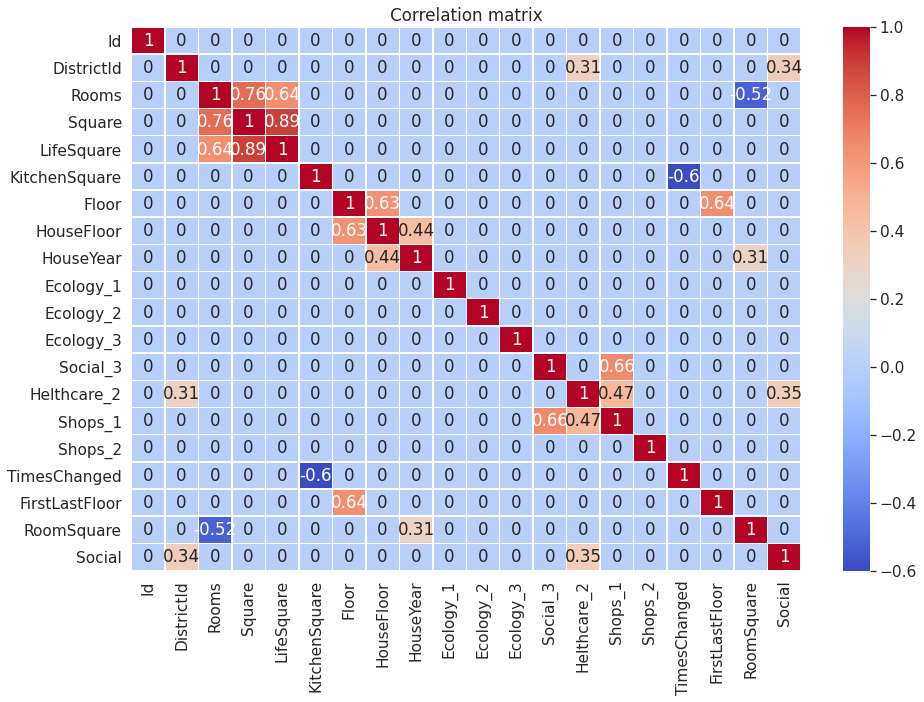

In [59]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df[all_features].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

### 4. Оценка модели перед корректировками.

In [60]:
X = df[all_features]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=5,
                                     min_samples_leaf=9,
                                     random_state=42,  
                                     n_estimators=200)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)

y_test_preds = gb_model.predict(X_test)

Train R2:	0.878
Test R2:	0.736


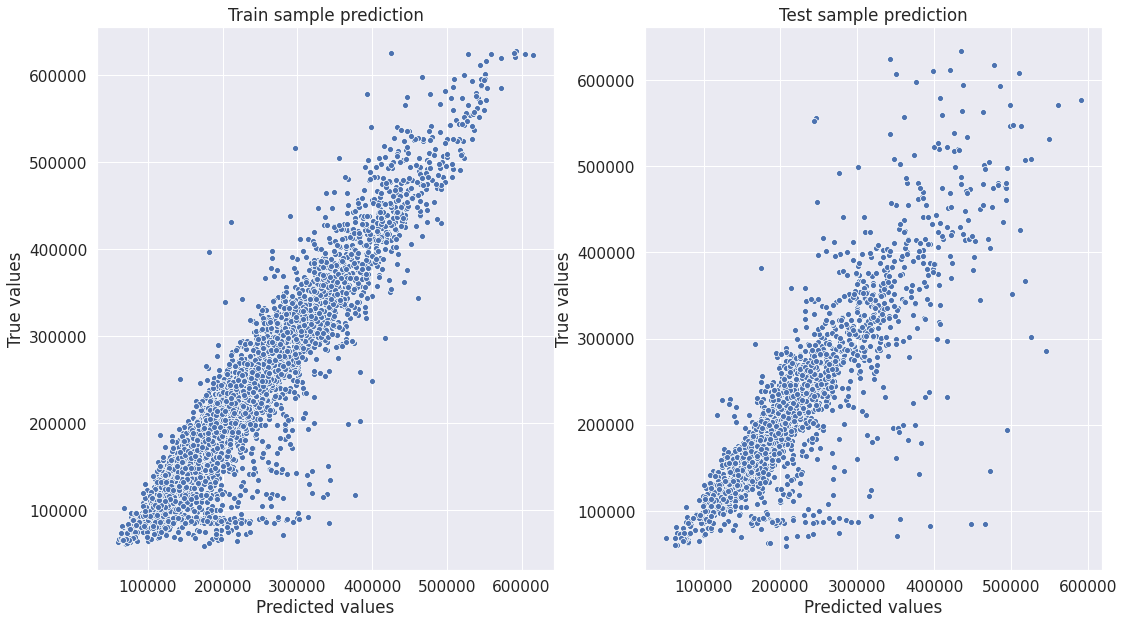

In [62]:
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

### 5. Корректировки и финальные результаты.

In [63]:
cv_score = cross_val_score(gb_model, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.73652836, 0.72967885, 0.75334001])

In [64]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances

,feature_name,importance
3,Square,0.417431
12,Social_3,0.137538
19,Social,0.083136
1,DistrictId,0.078595
2,Rooms,0.057317
9,Ecology_1,0.046171
14,Shops_1,0.032559
5,KitchenSquare,0.024820
13,Helthcare_2,0.024740
8,HouseYear,0.021882


In [65]:
final_features = ['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'TimesChanged',
 'FirstLastFloor',
 'RoomSquare',
 'Social']

In [66]:
X = df[final_features]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [67]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=5,
                                     min_samples_leaf=9,
                                     random_state=42,  
                                     n_estimators=200)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)

y_test_preds = gb_model.predict(X_test)

Train R2:	0.876
Test R2:	0.738


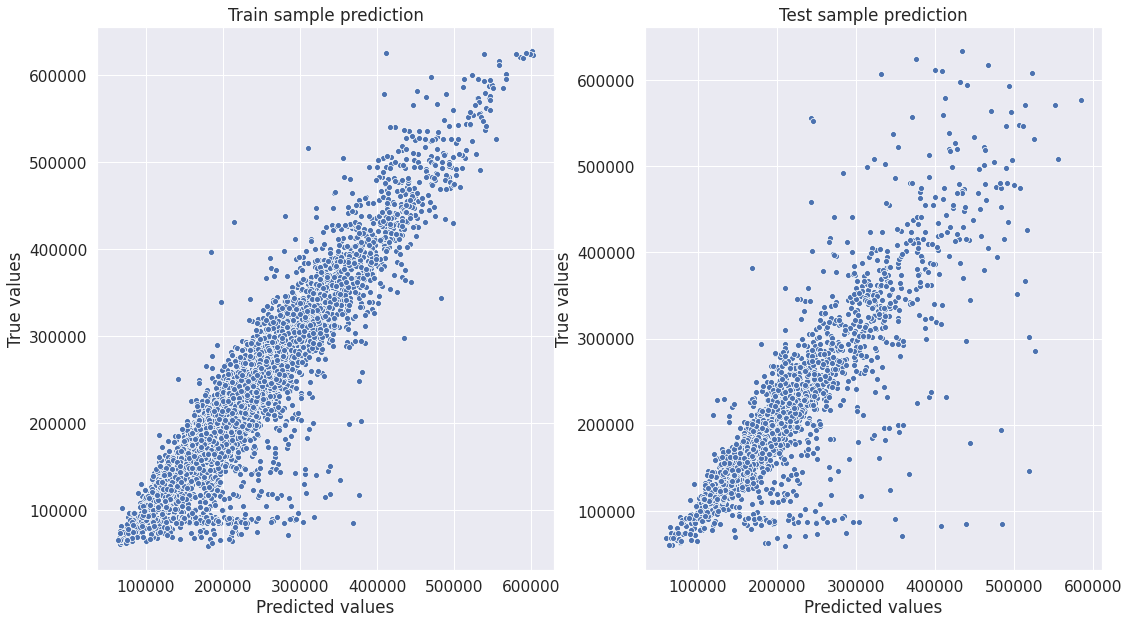

In [68]:
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

### 6. Прогнозирование на тестовом датасете.

In [69]:
test_directory = '/home/maxim/Документы/GeekBrains/1 четверть. Библиотки Python для Data Science. Numpy, Matplotlib, Scikit-learn/Manuals/test.csv'

In [70]:
new_file = '/home/maxim/Документы/GeekBrains/1 четверть. Библиотки Python для Data Science. Numpy, Matplotlib, Scikit-learn/Manuals/prices_test.csv'

In [71]:
df_test = pd.read_csv(test_directory)
df_test = pipe.transform(df_test)

In [72]:
df_test = feat.generate(df_test)

In [73]:
predictions = gb_model.predict(df_test[final_features])
predictions

array([161204.55346326, 180005.02187611, 229011.64194835, ...,
       321072.10835269, 194079.2597605 , 191052.452141  ])

In [74]:
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,TimesChanged,FirstLastFloor,RoomSquare,Social,KitchenLife
0,725,58,2.0,49.882643,31.139075,6.0,6,14.0,8.0,0.310199,...,1,900.0,0,0,1,1,0.428571,15.569538,0.004003,0.192684
1,15856,74,2.0,69.263183,43.237313,2.0,6,10.0,8.0,0.075779,...,3,900.0,0,2,1,3,0.600000,21.618657,0.004175,0.046256
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1.0,0.000000,...,87,4702.0,5,5,1,0,0.400000,15.948246,0.003980,0.752434
3,15664,47,2.0,73.046609,45.599104,9.0,22,22.0,11.0,0.101872,...,3,900.0,3,3,1,1,1.000000,22.799552,0.005019,0.197372
4,14275,27,1.0,47.527111,29.668642,2.0,17,17.0,12.0,0.072158,...,1,900.0,0,0,0,2,1.000000,29.668642,0.003180,0.067411


In [75]:
y_predict_id = pd.DataFrame(df_test, columns=['Id'])
y_predict_2 = pd.DataFrame(predictions, columns=['Price'])
new_prices = pd.concat([y_predict_id, y_predict_2], axis=1)
new_prices.to_csv('/home/maxim/Документы/GeekBrains/1 четверть. Библиотки Python для Data Science. Numpy, Matplotlib, Scikit-learn/Tasks/Курсовой проект/v.1.5.csv', index=False)